In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
df=pd.read_csv('xyz.csv')

In [20]:
df

,Unnamed: 0,close,company_news,world_news,company_trends,pandemic,quarantine,lockdown,presidential election
0,0,220.865648,-0.020578,-0.126191,28.52895,0.4290,0.2950,0.583333,1.090267
1,1,221.337433,-0.024527,-0.126247,28.50970,0.4125,0.2715,0.554667,1.147267
2,2,221.797187,-0.029351,-0.126321,28.46220,0.4095,0.2420,0.550000,1.196267
3,3,222.240032,-0.033164,-0.126396,28.42895,0.3940,0.2120,0.544667,1.234867
4,4,222.669781,-0.036050,-0.126470,28.39170,0.4260,0.2250,0.554667,1.269467
...,...,...,...,...,...,...,...,...,...
99,99,138.960305,0.194574,-0.134458,26.61790,46.9670,70.0140,18.457000,0.923733
100,100,139.732246,0.196934,-0.134507,26.61770,45.8950,69.8040,18.245333,0.914400
101,101,140.483304,0.202382,-0.134540,26.59990,44.9905,69.6780,18.171000,0.906000
102,102,141.552354,0.209054,-0.134576,26.58680,44.5885,69.3420,18.178000,0.896933


In [22]:
test = df
# Target column
target_adj_close = pd.DataFrame(test['close'])
# display(test.head())


# In[31]:

feature_columns = ['company_news','world_news','company_trends','pandemic','quarantine','presidential election','lockdown']


# In[32]:


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
# feature_minmax_transform


In [23]:
target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-20:-1]
target_adj_close = target_adj_close[:-20]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-20:-1]
feature_minmax_transform = feature_minmax_transform[:-20]
# display(validation_X.tail())
# display(validation_y.tail())

# print("\n -----After process------ \n")
# print('Shape of features : ', feature_minmax_transform.shape)
# print('Shape of target : ', target_adj_close.shape)
# display(target_adj_close.tail())

In [24]:
ts_split= TimeSeriesSplit(n_splits=3)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()


In [25]:
X_train.shape


(63, 7)

In [26]:
X_test.shape

(21, 7)

In [27]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

In [28]:

X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(60, input_shape=(1, X_train.shape[1]), activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=1000,batch_size=3)


Epoch 1/1000
63/63 [==============================] - 0s 6ms/step - loss: 45835.5073
Epoch 2/1000
63/63 [==============================] - 0s 535us/step - loss: 45772.6499
Epoch 3/1000
63/63 [==============================] - 0s 525us/step - loss: 45680.7753
Epoch 4/1000
63/63 [==============================] - 0s 549us/step - loss: 45542.9042
Epoch 5/1000
63/63 [==============================] - 0s 537us/step - loss: 45340.9701
Epoch 6/1000
63/63 [==============================] - 0s 468us/step - loss: 45057.4736
Epoch 7/1000
63/63 [==============================] - 0s 437us/step - loss: 44673.7329
Epoch 8/1000
63/63 [==============================] - 0s 434us/step - loss: 44171.4673
Epoch 9/1000
63/63 [==============================] - 0s 423us/step - loss: 43538.6821
Epoch 10/1000
63/63 [==============================] - 0s 427us/step - loss: 42761.1802
Epoch 11/1000
63/63 [==============================] - 0s 524us/step - loss: 41845.7225
Epoch 12/1000
63/63 [======================

63/63 [==============================] - 0s 406us/step - loss: 68.7786
Epoch 96/1000
63/63 [==============================] - 0s 435us/step - loss: 67.7123
Epoch 97/1000
63/63 [==============================] - 0s 450us/step - loss: 66.7473
Epoch 98/1000
63/63 [==============================] - 0s 432us/step - loss: 65.9219
Epoch 99/1000
63/63 [==============================] - 0s 490us/step - loss: 64.8893
Epoch 100/1000
63/63 [==============================] - 0s 441us/step - loss: 64.1808
Epoch 101/1000
63/63 [==============================] - 0s 416us/step - loss: 63.3238
Epoch 102/1000
63/63 [==============================] - 0s 380us/step - loss: 62.4264
Epoch 103/1000
63/63 [==============================] - 0s 377us/step - loss: 61.6843
Epoch 104/1000
63/63 [==============================] - 0s 409us/step - loss: 60.9197
Epoch 105/1000
63/63 [==============================] - 0s 384us/step - loss: 60.1463
Epoch 106/1000
63/63 [==============================] - 0s 402us/step - l

63/63 [==============================] - 0s 387us/step - loss: 38.4881
Epoch 191/1000
63/63 [==============================] - 0s 396us/step - loss: 38.3913
Epoch 192/1000
63/63 [==============================] - 0s 376us/step - loss: 38.3434
Epoch 193/1000
63/63 [==============================] - 0s 398us/step - loss: 38.4584
Epoch 194/1000
63/63 [==============================] - 0s 380us/step - loss: 38.6203
Epoch 195/1000
63/63 [==============================] - 0s 409us/step - loss: 38.1066
Epoch 196/1000
63/63 [==============================] - 0s 417us/step - loss: 38.0323
Epoch 197/1000
63/63 [==============================] - 0s 434us/step - loss: 38.0402
Epoch 198/1000
63/63 [==============================] - 0s 414us/step - loss: 37.9797
Epoch 199/1000
63/63 [==============================] - 0s 421us/step - loss: 38.1960
Epoch 200/1000
63/63 [==============================] - 0s 417us/step - loss: 37.9193
Epoch 201/1000
63/63 [==============================] - 0s 401us/step

63/63 [==============================] - 0s 379us/step - loss: 32.7655
Epoch 286/1000
63/63 [==============================] - 0s 366us/step - loss: 32.4736
Epoch 287/1000
63/63 [==============================] - 0s 361us/step - loss: 32.5866
Epoch 288/1000
63/63 [==============================] - 0s 360us/step - loss: 33.1977
Epoch 289/1000
63/63 [==============================] - 0s 375us/step - loss: 32.5151
Epoch 290/1000
63/63 [==============================] - 0s 385us/step - loss: 32.7590
Epoch 291/1000
63/63 [==============================] - 0s 366us/step - loss: 32.2162
Epoch 292/1000
63/63 [==============================] - 0s 374us/step - loss: 32.1643
Epoch 293/1000
63/63 [==============================] - 0s 396us/step - loss: 32.0801
Epoch 294/1000
63/63 [==============================] - 0s 390us/step - loss: 32.1012
Epoch 295/1000
63/63 [==============================] - 0s 393us/step - loss: 32.2338
Epoch 296/1000
63/63 [==============================] - 0s 385us/step

63/63 [==============================] - 0s 389us/step - loss: 26.5268
Epoch 381/1000
63/63 [==============================] - 0s 388us/step - loss: 26.1181
Epoch 382/1000
63/63 [==============================] - 0s 390us/step - loss: 26.3916
Epoch 383/1000
63/63 [==============================] - 0s 382us/step - loss: 26.5127
Epoch 384/1000
63/63 [==============================] - 0s 380us/step - loss: 25.9535
Epoch 385/1000
63/63 [==============================] - 0s 381us/step - loss: 26.3789
Epoch 386/1000
63/63 [==============================] - 0s 374us/step - loss: 26.0932
Epoch 387/1000
63/63 [==============================] - 0s 390us/step - loss: 26.0786
Epoch 388/1000
63/63 [==============================] - 0s 406us/step - loss: 26.3884
Epoch 389/1000
63/63 [==============================] - 0s 400us/step - loss: 25.7266
Epoch 390/1000
63/63 [==============================] - 0s 390us/step - loss: 26.0184
Epoch 391/1000
63/63 [==============================] - 0s 380us/step

63/63 [==============================] - 0s 366us/step - loss: 21.7711
Epoch 476/1000
63/63 [==============================] - 0s 368us/step - loss: 20.7369
Epoch 477/1000
63/63 [==============================] - 0s 366us/step - loss: 21.0852
Epoch 478/1000
63/63 [==============================] - 0s 366us/step - loss: 21.5561
Epoch 479/1000
63/63 [==============================] - 0s 366us/step - loss: 20.8699
Epoch 480/1000
63/63 [==============================] - 0s 361us/step - loss: 20.7392
Epoch 481/1000
63/63 [==============================] - 0s 364us/step - loss: 21.6369
Epoch 482/1000
63/63 [==============================] - 0s 375us/step - loss: 21.4959
Epoch 483/1000
63/63 [==============================] - 0s 392us/step - loss: 20.7883
Epoch 484/1000
63/63 [==============================] - 0s 373us/step - loss: 20.6394
Epoch 485/1000
63/63 [==============================] - 0s 373us/step - loss: 20.5891
Epoch 486/1000
63/63 [==============================] - 0s 389us/step

63/63 [==============================] - 0s 384us/step - loss: 17.7639
Epoch 571/1000
63/63 [==============================] - 0s 416us/step - loss: 18.0118
Epoch 572/1000
63/63 [==============================] - 0s 385us/step - loss: 17.9768
Epoch 573/1000
63/63 [==============================] - 0s 469us/step - loss: 17.9569
Epoch 574/1000
63/63 [==============================] - 0s 497us/step - loss: 17.7069
Epoch 575/1000
63/63 [==============================] - 0s 397us/step - loss: 18.6091
Epoch 576/1000
63/63 [==============================] - 0s 392us/step - loss: 17.3010
Epoch 577/1000
63/63 [==============================] - 0s 382us/step - loss: 17.4339
Epoch 578/1000
63/63 [==============================] - 0s 371us/step - loss: 18.1911
Epoch 579/1000
63/63 [==============================] - 0s 361us/step - loss: 17.8203
Epoch 580/1000
63/63 [==============================] - 0s 372us/step - loss: 17.2057
Epoch 581/1000
63/63 [==============================] - 0s 372us/step

63/63 [==============================] - 0s 367us/step - loss: 15.6621
Epoch 666/1000
63/63 [==============================] - 0s 370us/step - loss: 15.5350
Epoch 667/1000
63/63 [==============================] - 0s 356us/step - loss: 16.0909
Epoch 668/1000
63/63 [==============================] - 0s 368us/step - loss: 15.5489
Epoch 669/1000
63/63 [==============================] - 0s 384us/step - loss: 15.7922
Epoch 670/1000
63/63 [==============================] - 0s 389us/step - loss: 15.6075
Epoch 671/1000
63/63 [==============================] - 0s 379us/step - loss: 15.6680
Epoch 672/1000
63/63 [==============================] - 0s 350us/step - loss: 15.3190
Epoch 673/1000
63/63 [==============================] - 0s 394us/step - loss: 15.7793
Epoch 674/1000
63/63 [==============================] - 0s 388us/step - loss: 15.4664
Epoch 675/1000
63/63 [==============================] - 0s 383us/step - loss: 15.9387
Epoch 676/1000
63/63 [==============================] - 0s 367us/step

In [57]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)


The R2 score on the Train set is:	0.868
The R2 score on the Test set is:	-0.140


In [58]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)


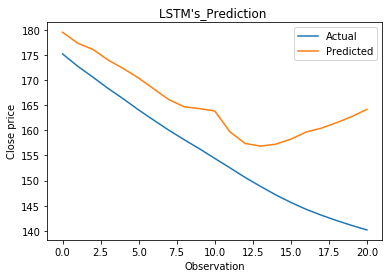

In [59]:
plt.plot(y_test, label='Actual')
plt.plot(y_pred_test_LSTM, label='Predicted')
plt.title("LSTM's_Prediction ")
plt.xlabel('Observation')
plt.ylabel('Close price')
plt.legend()
plt.show()

In [54]:
a=zip(list(y_test),list(y_pred_test_LSTM))

In [55]:
list(a)

[(175.19084713752682, array([176.0395], dtype=float32)),
 (172.73708106056338, array([172.82907], dtype=float32)),
 (170.56647592695361, array([170.47862], dtype=float32)),
 (168.3151701773165, array([167.20828], dtype=float32)),
 (166.24153998747371, array([164.69658], dtype=float32)),
 (164.05947924698998, array([162.25417], dtype=float32)),
 (162.00728078967737, array([159.68547], dtype=float32)),
 (159.99485173016606, array([157.21747], dtype=float32)),
 (158.12618157890225, array([155.46475], dtype=float32)),
 (156.32923259567968, array([154.84506], dtype=float32)),
 (154.43076420017246, array([154.0255], dtype=float32)),
 (152.54958357581563, array([148.93404], dtype=float32)),
 (150.62908718683337, array([145.44632], dtype=float32)),
 (148.87917265074438, array([144.12987], dtype=float32)),
 (147.18622805580318, array([143.86418], dtype=float32)),
 (145.67757000651252, array([144.4688], dtype=float32)),
 (144.31098995744267, array([145.84802], dtype=float32)),
 (143.140679465962